# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     772.1
Date:                Thu, 18 Sep 2025   Prob (F-statistic):           2.47e-39
Time:                        16:08:21   Log-Likelihood:                -4.5000
No. Observations:                  50   AIC:                             17.00
Df Residuals:                      46   BIC:                             24.65
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9479      0.094     52.591      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.42269382  4.92085251  5.37819024  5.76644279  6.06754634  6.27660533
  6.40269675  6.46737885  6.50114919  6.53843394  6.61193177  6.74724156
  6.95865659  7.24681615  7.59860056  7.98928665  8.38660975  8.75606463
  9.06657466  9.2955976   9.43282922  9.48189625  9.45976052  9.39393221
  9.31794994  9.26587056  9.26667361  9.33950014  9.49050784  9.71185938
  9.98301005 10.27408319 10.55077884 10.78000915 10.93533461 11.00130795
 10.97601214 10.87137532 10.71121104 10.52730578 10.35419649 10.2234963
 10.15870056 10.17132661 10.25902153 10.40594869 10.58538971 10.76413418
 10.90793603 10.9871401 ]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.9675776  10.81093739 10.53755773 10.19378689  9.84063551  9.53883907
  9.33398771  9.24536418  9.26122276  9.34166499]


## Plot comparison

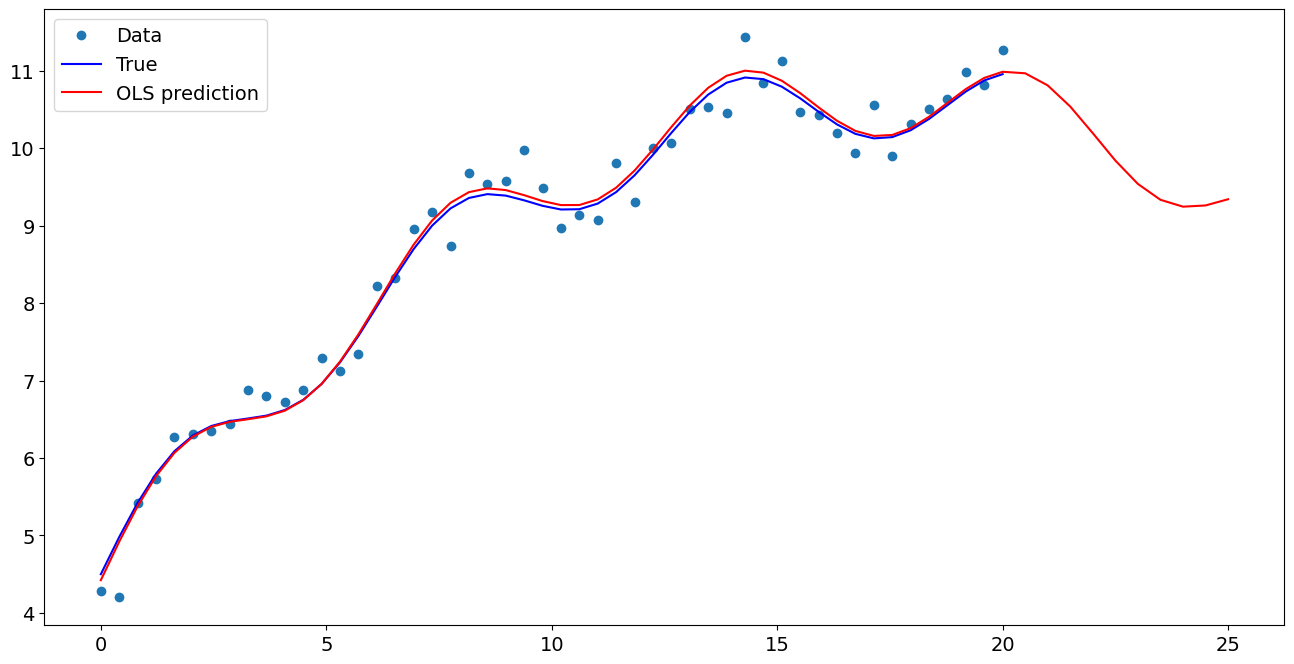

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.947916
x1                  0.514638
np.sin(x1)          0.518618
I((x1 - 5) ** 2)   -0.021009
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.967578
1    10.810937
2    10.537558
3    10.193787
4     9.840636
5     9.538839
6     9.333988
7     9.245364
8     9.261223
9     9.341665
dtype: float64